In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model # type: ignore
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
data = np.load('../assets/dataset/data.npz')

# Extract the data
X = data['X']; y_gender = data['y_gender']; y_age = data['y_age']

# Load the models
model_1 = load_model('../models/age_gender_estimation/custom_CNN/custom_CNN.keras')
model_2 = load_model('../models/age_gender_estimation/custom_ResNet50/custom_ResNet50.keras')

# Get the validation split by sampling 20% of X instead of using taking the last 20% of the data
val_split = int(len(X) * 0.2)
indices = np.random.permutation(len(X))
val_indices = indices[:val_split]
X_val = X[val_indices]
y_age_val = y_age[val_indices]

c:\Users\froms\anaconda3\envs\si\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 20 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\froms\anaconda3\envs\si\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 218 variables whereas the saved optimizer has 434 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [2]:
# Preprocess the images and predict ages using your models
predicted_ages_model_1 = []
predicted_ages_model_2 = []

for image in X_val:
    input_image = image.reshape(128, 128, 3)  # assuming the image is RGB
    input_image = np.expand_dims(input_image, axis=0)  # add batch dimension

    pred_1 = model_1.predict(input_image)
    pred_2 = model_2.predict(input_image)

    predicted_ages_model_1.append(pred_1[1][0][0])
    predicted_ages_model_2.append(pred_2[1][0][0])

# Convert the lists to numpy arrayss
predicted_ages_model_1 = np.array(predicted_ages_model_1)
predicted_ages_model_2 = np.array(predicted_ages_model_2)

# Calculate the true ages
true_ages = y_age_val

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━

C:\Users\froms\AppData\Local\Temp\ipykernel_5248\3999813177.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_age_val, kde=True, bins=30, color='green', label='True Ages')


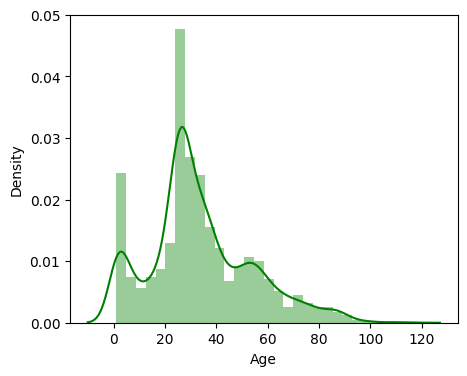

In [39]:
plt.figure(figsize=(5, 4))

# Plot the distribution of the validation ages
sns.distplot(y_age_val, kde=True, bins=30, color='green', label='True Ages')
plt.xlabel('Age')
plt.ylabel('Density')
# plt.title('Distribution of Validation Ages')
plt.show()

Mean Absolute Error (MAE): 6.21
Mean Squared Error (MSE): 86.33
Root Mean Squared Error (RMSE): 9.29
R² (Coefficient of Determination): 0.79


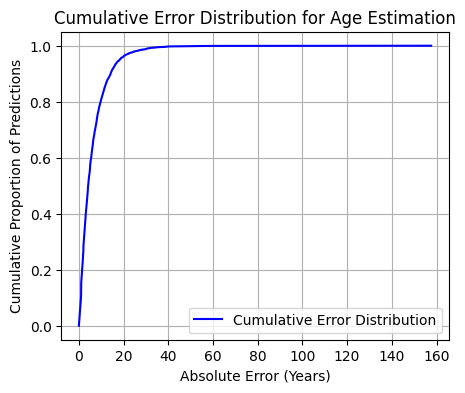

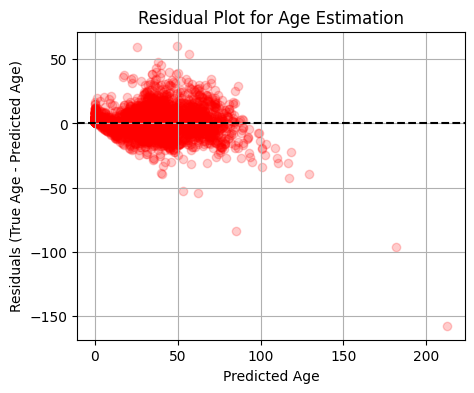

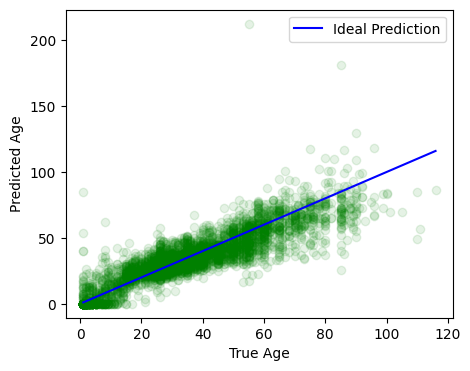

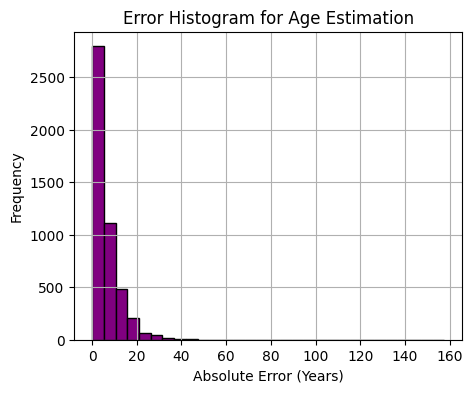

In [63]:
# Generate synthetic data for age estimation
y_true = true_ages
y_pred = predicted_ages_model_1

# Compute evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² (Coefficient of Determination): {r2:.2f}")

# Compute absolute errors
errors = np.abs(y_true - y_pred)
sorted_errors = np.sort(errors)
cumulative_proportion = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors)

# Plot 1: Cumulative Error Distribution
plt.figure(figsize=(5, 4))
plt.plot(sorted_errors, cumulative_proportion, label="Cumulative Error Distribution", color="blue")
plt.xlabel("Absolute Error (Years)")
plt.ylabel("Cumulative Proportion of Predictions")
plt.title("Cumulative Error Distribution for Age Estimation")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Residual Plot
plt.figure(figsize=(5, 4))
residuals = y_true - y_pred
plt.scatter(y_pred, residuals, alpha=0.2, color="red")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Predicted Age")
plt.ylabel("Residuals (True Age - Predicted Age)")
plt.title("Residual Plot for Age Estimation")
plt.grid(True)
plt.show()

# Plot 3: Scatter Plot (True vs Predicted)
plt.figure(figsize=(5, 4))
plt.scatter(y_true, y_pred, alpha=0.1, color="green")
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color="blue", linestyle="-", label="Ideal Prediction")
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
# plt.title("True Age vs Predicted Age")
plt.legend()
# plt.grid(True)
plt.show()

# Plot 4: Error Histogram
plt.figure(figsize=(5, 4))
plt.hist(errors, bins=30, color="purple", edgecolor="black")
plt.xlabel("Absolute Error (Years)")
plt.ylabel("Frequency")
plt.title("Error Histogram for Age Estimation")
plt.grid(True)
plt.show()


# `Cumulative Score Curve`

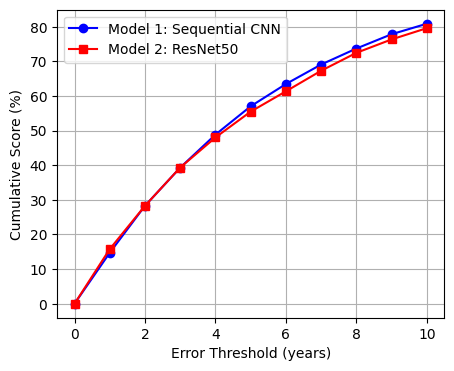

In [55]:
def cumulative_score(y_true, y_pred, thresholds):
    """
    Calculate the cumulative score for age estimation.

    Parameters:
    - y_true: List or array of true ages.
    - y_pred: List or array of predicted ages.
    - thresholds: List of error thresholds (e.g., [1, 2, 3, 5, 10]).

    Returns:
    - A dictionary with thresholds as keys and cumulative scores as values.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate absolute errors
    errors = np.abs(y_pred - y_true)
    
    # Compute cumulative scores for each threshold
    cumulative_scores = {}
    for t in thresholds:
        cumulative_scores[t] = np.mean(errors <= t)
    
    return cumulative_scores

def plot_cumulative_score_curve(y_true, y_pred_1, y_pred_2, max_threshold=10):
    """
    Plot the Cumulative Score Curve for two models in the same figure.

    Parameters:
    - y_true: List or array of true ages.
    - y_pred_1: List or array of predicted ages from model 1.
    - y_pred_2: List or array of predicted ages from model 2.
    - max_threshold: Maximum error threshold to plot (default is 10).
    """
    # Define thresholds from 0 to max_threshold
    thresholds = np.arange(0, max_threshold + 1)
    
    # Calculate cumulative scores for both models
    scores_1 = cumulative_score(y_true, y_pred_1, thresholds)
    scores_2 = cumulative_score(y_true, y_pred_2, thresholds)
    
    # Extract x (thresholds) and y (scores) values for both models
    x = list(scores_1.keys())
    y1 = [scores_1[t] * 100 for t in x]  # Convert to percentage
    y2 = [scores_2[t] * 100 for t in x]  # Convert to percentage
    
    # Plot the curves
    plt.figure(figsize=(5, 4))
    plt.plot(x, y1, marker='o', linestyle='-', color='b', label='Model 1: Sequential CNN')
    plt.plot(x, y2, marker='s', linestyle='-', color='r', label='Model 2: ResNet50')
    plt.xlabel('Error Threshold (years)')
    plt.ylabel('Cumulative Score (%)')
    # plt.title('Cumulative Score Curve for Age Estimation')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
y_true = true_ages
y_pred_1 = predicted_ages_model_1
y_pred_2 = predicted_ages_model_2

# Plot the Cumulative Score Curves for both models
plot_cumulative_score_curve(y_true, y_pred_1, y_pred_2, max_threshold=10)